# Preparation

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import os
from matplotlib.ticker import FormatStrFormatter

### Plot utils

In [2]:
def read_json(file_path):
    with open(file_path, 'r') as json_file:
        data = json.load(json_file)
    return data

In [3]:
def to_color_blind(color):
    if color == 'red':
        return '#e41a1c'
    elif color == 'blue':
        return '#377eb8'
    elif color == 'orange':
        return '#ff7f00'
    elif color == 'green':
        return '#4daf4a'
    elif color == 'brown':
        return '#a65628'
    elif color == 'grey':
        return '#999999'
    elif color == 'yellow':
        return '#dede00'
    elif color == 'pink':
        return '#f781bf'
    elif color == 'purple':
        return '#984ea3'
    else:
        raise NotImplementedError("color not available")

def obtain_markers(number_of_markers):
    list_of_markers = ['o', 'v', 's', 'p', 'P', '*', 'X', '+', 'D', 'x']
    return list_of_markers[:number_of_markers]

def obtain_color(number_of_colors):
    all = ['#e41a1c', '#377eb8','#ff7f00','#4daf4a','#a65628',
        '#999999','#dede00','#f781bf','#984ea3']
    return all[:number_of_colors]

### Important vars

In [4]:
names_to_labels = {'ml-1m' : 'MovieLens 1M', 'ml-100k' : 'MovieLens 100k', 'amazon_beauty' : 'Amazon Beauty', 'foursquare-tky' : 'Foursquare TKY', 'foursquare-nyc' : 'Foursquare NYC',
                   'emb_size' : 'Embedding Size', 'lookback' : 'Input sequence length', 'carbon_emissions' : r'CO\textsubscript{2}-eq', 'model_size' : 'Model Size',
                   'ml-20m': 'MovieLens 20M'}

In [5]:
all_datasets = sorted(['ml-1m', 'ml-100k', 'amazon_beauty', 'foursquare-tky', 'foursquare-nyc'])
all_models= sorted(['SASRec','NARM', 'GRU4Rec', 'BERT4Rec', 'CORE'])
metrics_names = ["Precision", "Recall", "NDCG", "MAP"]
metrics_ks = [5, 10, 20]
all_metrics_names = [f"{metric}@{k}" for metric in metrics_names for k in metrics_ks]

# MAIN

## Load all experiments

### Exp configs

In [6]:
def flatten_dict(d, parent_key='', sep='.'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

In [7]:
def load_all_configurations(exp_name:str='prova', folder_name:str= '../out/exp/'):
    experiments = {}
    for single_config in os.listdir(os.path.join(os.getcwd(),folder_name,exp_name)):
        exp_id = single_config.replace('.json', '')
        data = read_json(os.path.join(os.getcwd(),folder_name,exp_name,single_config))
        experiments[exp_id] = flatten_dict(data)
    return pd.DataFrame.from_dict(dict(sorted(experiments.items())), "index") #sorted is not actually needed

In [8]:
all_exps = load_all_configurations("april_30")

In [9]:
all_exps

,data_params.collator_params.lookback,data_params.collator_params.lookforward,data_params.collator_params.num_items,data_params.collator_params.num_negatives.test,data_params.collator_params.num_negatives.train,data_params.collator_params.num_negatives.val,data_params.collator_params.out_seq_len.test,data_params.collator_params.out_seq_len.train,data_params.collator_params.out_seq_len.val,data_params.collator_params.padding_value,...,model.rec_model.ss_config.measure,model.rec_model.num_blocks,model.rec_model.num_heads,data_params.collator_params.mask_prob,model.rec_model.bert_num_blocks,model.rec_model.bert_num_heads,model.rec_model.ss_config.dropout,model.rec_model.ss_config.init,model.rec_model.ss_config.lr,model.rec_model.ss_config.mode
1jpFYFEkj6ScTszF,200,1,1076,100,1,1,1,None,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2VF5BQdV8QtXIHQX,200,1,15177,100,1,1,1,None,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3CP7AfCguTPqhXTs,50,1,3416,100,1,1,1,None,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4TPi0PH1uDUxUUSh,100,1,3416,100,1,1,1,None,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6FsRXbceFAlMmdfE,200,1,3416,100,1,1,1,None,1,0,...,lagt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wiu6rYGdEuGgsOPT,200,0,9989,100,1,1,1,None,1,0,...,NaN,NaN,NaN,0.15,1.0,4.0,NaN,NaN,NaN,NaN
wvHx247bXqMWF5rI,50,1,3416,100,1,1,1,None,1,0,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
y5pPoVbfegwOGzYP,200,1,3416,100,1,1,1,None,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.2,legs,0.01,diag
yHlz4AShbv2xf1KN,100,0,3416,100,1,1,1,None,1,0,...,NaN,NaN,NaN,0.15,1.0,4.0,NaN,NaN,NaN,NaN


### Load exp metrics

In [10]:
def load_metrics(exp_name:str='prova', folder_name:str= '../out/log/'):
    results = {}
    exp_log_folder = os.path.join(os.getcwd(),folder_name,exp_name)
    for exp_id in os.listdir(exp_log_folder):
        metrics_filepath = os.path.join(exp_log_folder,exp_id,'lightning_logs/version_0/metrics.csv')
        data = pd.read_csv(metrics_filepath)
        results[exp_id] = data
    return dict(sorted(results.items()))

In [11]:
metrics_per_epoch = load_metrics("april_30")
metrics_per_epoch

{'1jpFYFEkj6ScTszF':       epoch  step  test_F1_@10  test_F1_@20  test_F1_@5  test_MAP_@10  \
 0         0     9          NaN          NaN         NaN           NaN   
 1         0     9          NaN          NaN         NaN           NaN   
 2         1    19          NaN          NaN         NaN           NaN   
 3         1    19          NaN          NaN         NaN           NaN   
 4         2    29          NaN          NaN         NaN           NaN   
 ...     ...   ...          ...          ...         ...           ...   
 1196    598  5989          NaN          NaN         NaN           NaN   
 1197    598  5989          NaN          NaN         NaN           NaN   
 1198    599  5999          NaN          NaN         NaN           NaN   
 1199    599  5999          NaN          NaN         NaN           NaN   
 1200    600  6000     0.171132     0.090104    0.312529      0.194579   
 
       test_MAP_@20  test_MAP_@5  test_MRR_@10  test_MRR_@20  ...  \
 0              NaN  

In [12]:
def get_metrics_given_best_val(metrics_per_epoch, metrics_names, metrics_prefix = "val", metrics_dataloader_idx=1, val_prefix = "val", val_metric="NDCG@10", val_dataloader_idx=0, fix_rec_at_k=False):
    if fix_rec_at_k:
        val_metric =val_metric.replace('@','_@')
        metrics_names = [metric.replace('@','_@') for metric in metrics_names]
    val_key = f"{val_prefix}_{val_metric}"
    if val_dataloader_idx is not None:
        val_key += f"/dataloader_idx_{val_dataloader_idx}"
    metric_keys = [f"{metrics_prefix}_{metric}" for metric in metrics_names]
    if metrics_dataloader_idx is not None:
        metric_keys = [f"{metric}/dataloader_idx_{metrics_dataloader_idx}" for metric in metric_keys]
    best_metrics = {}
    for exp_id, metrics in metrics_per_epoch.items():
        best_val_row = metrics[val_key].argmax()
        best_metrics[exp_id] = {metric_name: metrics[metric_key][best_val_row] for metric_name, metric_key in zip(metrics_names,metric_keys)}
    return pd.DataFrame.from_dict(dict(sorted(best_metrics.items())), "index") #sorted is not actually needed

In [13]:
best_metrics = get_metrics_given_best_val(metrics_per_epoch, all_metrics_names, fix_rec_at_k=True)
best_metrics

,Precision_@5,Precision_@10,Precision_@20,Recall_@5,Recall_@10,Recall_@20,NDCG_@5,NDCG_@10,NDCG_@20,MAP_@5,MAP_@10,MAP_@20
1jpFYFEkj6ScTszF,0.134380,0.068367,0.035047,0.671900,0.683673,0.700942,0.616300,0.620134,0.624541,0.275175,0.181449,0.113928
2VF5BQdV8QtXIHQX,0.153598,0.083646,0.044592,0.767990,0.836459,0.891845,0.681202,0.703530,0.717692,0.299036,0.201920,0.130047
3CP7AfCguTPqhXTs,0.125166,0.074487,0.042276,0.625828,0.744868,0.845530,0.470833,0.509594,0.535084,0.191956,0.141240,0.097409
4TPi0PH1uDUxUUSh,0.130099,0.076672,0.042964,0.650497,0.766722,0.859272,0.500793,0.538433,0.561887,0.206845,0.149991,0.102374
6FsRXbceFAlMmdfE,0.134437,0.079123,0.044147,0.672185,0.791225,0.882947,0.511630,0.550229,0.573486,0.210152,0.153201,0.104790
...,...,...,...,...,...,...,...,...,...,...,...,...
wiu6rYGdEuGgsOPT,0.146260,0.079409,0.043121,0.731302,0.794091,0.862419,0.652470,0.672815,0.690230,0.286454,0.192912,0.124356
wvHx247bXqMWF5rI,0.130828,0.076291,0.043071,0.654139,0.762914,0.861424,0.500829,0.536154,0.561167,0.206519,0.149851,0.102317
y5pPoVbfegwOGzYP,0.139603,0.079553,0.044106,0.698013,0.795530,0.882119,0.542600,0.574338,0.596271,0.225454,0.161758,0.109106
yHlz4AShbv2xf1KN,0.123742,0.074603,0.042326,0.618709,0.746027,0.846523,0.455200,0.496702,0.522324,0.183476,0.136911,0.095385


In [14]:
columns_for_diffs = ['duration', 'emissions', 'emissions_rate', 'cpu_power', 'gpu_power',
                    'ram_power', 'cpu_energy', 'gpu_energy', 'ram_energy',
                    'energy_consumed']
columns_that_are_same = ['project_name', 'run_id', 'country_name',
    'country_iso_code', 'region', 'cloud_provider', 'cloud_region', 'os',
    'python_version', 'codecarbon_version', 'cpu_count', 'cpu_model',
    'gpu_count', 'gpu_model', 'longitude', 'latitude', 'ram_total_size',
    'tracking_mode', 'on_cloud', 'pue']
columns_that_are_different = ['timestamp']

def load_emissions(exp_name:str='prova', folder_name:str= '../out/log/'):
    emissions = {}
    exp_log_folder = os.path.join(os.getcwd(),folder_name,exp_name)
    for exp_id in os.listdir(exp_log_folder):
        emissions_filepath = os.path.join(exp_log_folder,exp_id,'emissions.csv')
        if not os.path.exists(emissions_filepath): continue
        data = pd.read_csv(emissions_filepath)
    
        new_data = {}
        for column in columns_for_diffs:
            #TODO: generalize to more splits / rows of emissions
            new_data[f"train_{column}"] = data.iloc[0][column]
            new_data[f"test_{column}"] = data.iloc[1][column] - data.iloc[0][column]
        for column in columns_that_are_same:
            new_data[f"{column}"] = data.iloc[0][column]
        for column in columns_that_are_different:
            new_data[f"train_{column}"] = data.iloc[0][column]
            new_data[f"test_{column}"] = data.iloc[1][column]
        emissions[exp_id] = new_data

    return pd.DataFrame.from_dict(dict(sorted(emissions.items())), "index") #sorted is not actually needed

In [15]:
emissions = load_emissions("april_30")
emissions

,train_duration,test_duration,train_emissions,test_emissions,train_emissions_rate,test_emissions_rate,train_cpu_power,test_cpu_power,train_gpu_power,test_gpu_power,...,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue,train_timestamp,test_timestamp
1jpFYFEkj6ScTszF,410.127733,0.420278,0.011553,0.000011,0.000028,-2.012060e-09,95.0,0.0,198.131264,-14.581521,...,3,3 x NVIDIA RTX A4000,14.2385,40.867,62.646286,process,N,1.0,2024-05-06T15:06:02,2024-05-06T15:06:03
2VF5BQdV8QtXIHQX,2701.079224,1.416352,0.092135,0.000045,0.000034,-1.374376e-09,95.0,0.0,225.109259,12.669714,...,3,3 x NVIDIA RTX A4000,14.2385,40.867,62.646286,process,N,1.0,2024-05-04T02:22:32,2024-05-04T02:22:33
3CP7AfCguTPqhXTs,1783.142474,1.105175,0.041126,0.000025,0.000023,-4.326382e-10,95.0,0.0,145.965968,-5.095922,...,3,3 x NVIDIA RTX A4000,14.2385,40.867,62.646286,process,N,1.0,2024-05-05T02:07:59,2024-05-05T02:08:01
4TPi0PH1uDUxUUSh,2045.437006,1.198009,0.074228,0.000041,0.000036,-1.098524e-09,95.0,0.0,304.430829,-35.956509,...,3,3 x NVIDIA RTX A4000,14.2385,40.867,62.646286,process,N,1.0,2024-05-05T12:32:12,2024-05-05T12:32:13
6FsRXbceFAlMmdfE,1662.320106,1.051405,0.032061,0.000018,0.000019,-1.668875e-09,95.0,0.0,100.661504,-20.198563,...,3,3 x NVIDIA RTX A4000,14.2385,40.867,62.646286,process,N,1.0,2024-05-03T15:11:29,2024-05-03T15:11:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wiu6rYGdEuGgsOPT,1060.951983,0.672876,0.037582,0.000023,0.000035,-5.979574e-10,95.0,0.0,272.183096,-2.032087,...,3,3 x NVIDIA RTX A4000,14.2385,40.867,62.646286,process,N,1.0,2024-05-04T17:06:05,2024-05-04T17:06:05
wvHx247bXqMWF5rI,1800.701656,1.116982,0.041424,0.000025,0.000023,-2.724494e-10,95.0,0.0,131.481382,12.207939,...,3,3 x NVIDIA RTX A4000,14.2385,40.867,62.646286,process,N,1.0,2024-05-05T02:07:15,2024-05-05T02:07:16
y5pPoVbfegwOGzYP,3095.097497,1.491977,0.137561,0.000064,0.000044,-8.884000e-10,95.0,0.0,369.036492,-14.203137,...,3,3 x NVIDIA RTX A4000,14.2385,40.867,62.646286,process,N,1.0,2024-05-06T12:36:53,2024-05-06T12:36:54
yHlz4AShbv2xf1KN,2045.520173,1.180048,0.073346,0.000038,0.000036,-2.232004e-09,95.0,0.0,281.793954,-37.519299,...,3,3 x NVIDIA RTX A4000,14.2385,40.867,62.646286,process,N,1.0,2024-05-05T12:30:30,2024-05-05T12:30:32


In [16]:
modifiers = {"":1, "K":1e3, "M":1e6, "G":1e9, "T":1e12, "P":1e15}
strings_to_search = {"num_params":"params per GPU:",
                     "flops": "fwd flops per GPU:",
                     "latency": "fwd latency:",
                     "FLOPS": "fwd FLOPS per GPU = fwd flops per GPU / fwd latency:"}

def extract_flops_info(complete_string, string_to_search):
    if string_to_search in complete_string:
        value = complete_string.split(string_to_search)[1].split("\n")[0].strip()
    else: value = "nan"
    measure = ""
    if " " in value: value, measure = value.split(" ")
    scale = measure[0] if len(measure)>0 else ""
    if scale not in modifiers:
        scale = ""
        measure = " " + measure
    unit = "" if len(measure)==1 else measure[1:]
    return float(value)*modifiers[scale], unit

def load_flops(exp_name:str='prova', folder_name:str= '../out/log/', split_keys = ["train", "test"]):
    flops = {}
    exp_log_folder = os.path.join(os.getcwd(),folder_name,exp_name)
    for exp_id in os.listdir(exp_log_folder):
        new_data = {}
        for split_key in split_keys:
            flops_filepath = os.path.join(exp_log_folder,exp_id,f'{split_key}_flops.txt')
            if not os.path.exists(flops_filepath): continue
            #load flops_filepath txt
            with open(flops_filepath, 'r') as file:
                data = file.read()
            
            for measure_name,string_to_search in strings_to_search.items():
                value, unit = extract_flops_info(data, string_to_search)
                measure_key = f"{split_key}_{measure_name}"
                #if unit != "": measure_key += f" ({unit})"
                new_data[measure_key] = value
            
        flops[exp_id] = new_data

    return pd.DataFrame.from_dict(dict(sorted(flops.items())), "index") #sorted is not actually needed

In [17]:
all_flops = load_flops("april_30")
all_flops

,train_num_params,train_flops,train_latency,train_FLOPS,test_num_params,test_flops,test_latency,test_FLOPS
1jpFYFEkj6ScTszF,120770.0,3.189000e+13,57.12,5.582900e+11,120770.0,2.632000e+10,33.46,7.868500e+11
2VF5BQdV8QtXIHQX,3000000.0,3.330330e+15,605.42,5.500000e+12,3000000.0,1.850000e+12,333.62,5.550000e+12
3CP7AfCguTPqhXTs,254780.0,7.011000e+13,161.22,4.348700e+11,254780.0,4.915000e+10,86.37,5.691100e+11
4TPi0PH1uDUxUUSh,733980.0,1.112370e+15,257.27,4.320000e+12,733980.0,6.179500e+11,146.11,4.230000e+12
6FsRXbceFAlMmdfE,239940.0,1.936000e+13,158.75,1.219400e+11,239940.0,1.083000e+10,90.35,1.198900e+11
...,...,...,...,...,...,...,...,...
wiu6rYGdEuGgsOPT,1350000.0,5.582000e+14,140.31,3.980000e+12,1350000.0,2.770000e+11,77.71,3.560000e+12
wvHx247bXqMWF5rI,272000.0,7.498000e+13,165.66,4.525800e+11,272000.0,4.552000e+10,86.96,5.234200e+11
y5pPoVbfegwOGzYP,2480000.0,2.292380e+15,1030.00,2.220000e+12,2480000.0,1.270000e+12,534.32,2.380000e+12
yHlz4AShbv2xf1KN,497310.0,5.580100e+14,274.53,2.030000e+12,497310.0,2.642500e+11,142.91,1.850000e+12


In [18]:
complete_data = pd.concat([all_exps, best_metrics, emissions, all_flops], axis=1)
complete_data

,data_params.collator_params.lookback,data_params.collator_params.lookforward,data_params.collator_params.num_items,data_params.collator_params.num_negatives.test,data_params.collator_params.num_negatives.train,data_params.collator_params.num_negatives.val,data_params.collator_params.out_seq_len.test,data_params.collator_params.out_seq_len.train,data_params.collator_params.out_seq_len.val,data_params.collator_params.padding_value,...,train_timestamp,test_timestamp,train_num_params,train_flops,train_latency,train_FLOPS,test_num_params,test_flops,test_latency,test_FLOPS
1jpFYFEkj6ScTszF,200.0,1.0,1076.0,100.0,1.0,1.0,1.0,None,1.0,0.0,...,2024-05-06T15:06:02,2024-05-06T15:06:03,120770.0,3.189000e+13,57.12,5.582900e+11,120770.0,2.632000e+10,33.46,7.868500e+11
2VF5BQdV8QtXIHQX,200.0,1.0,15177.0,100.0,1.0,1.0,1.0,None,1.0,0.0,...,2024-05-04T02:22:32,2024-05-04T02:22:33,3000000.0,3.330330e+15,605.42,5.500000e+12,3000000.0,1.850000e+12,333.62,5.550000e+12
3CP7AfCguTPqhXTs,50.0,1.0,3416.0,100.0,1.0,1.0,1.0,None,1.0,0.0,...,2024-05-05T02:07:59,2024-05-05T02:08:01,254780.0,7.011000e+13,161.22,4.348700e+11,254780.0,4.915000e+10,86.37,5.691100e+11
4TPi0PH1uDUxUUSh,100.0,1.0,3416.0,100.0,1.0,1.0,1.0,None,1.0,0.0,...,2024-05-05T12:32:12,2024-05-05T12:32:13,733980.0,1.112370e+15,257.27,4.320000e+12,733980.0,6.179500e+11,146.11,4.230000e+12
6FsRXbceFAlMmdfE,200.0,1.0,3416.0,100.0,1.0,1.0,1.0,None,1.0,0.0,...,2024-05-03T15:11:29,2024-05-03T15:11:30,239940.0,1.936000e+13,158.75,1.219400e+11,239940.0,1.083000e+10,90.35,1.198900e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wvHx247bXqMWF5rI,50.0,1.0,3416.0,100.0,1.0,1.0,1.0,None,1.0,0.0,...,2024-05-05T02:07:15,2024-05-05T02:07:16,272000.0,7.498000e+13,165.66,4.525800e+11,272000.0,4.552000e+10,86.96,5.234200e+11
y5pPoVbfegwOGzYP,200.0,1.0,3416.0,100.0,1.0,1.0,1.0,None,1.0,0.0,...,2024-05-06T12:36:53,2024-05-06T12:36:54,2480000.0,2.292380e+15,1030.00,2.220000e+12,2480000.0,1.270000e+12,534.32,2.380000e+12
yHlz4AShbv2xf1KN,100.0,0.0,3416.0,100.0,1.0,1.0,1.0,None,1.0,0.0,...,2024-05-05T12:30:30,2024-05-05T12:30:32,497310.0,5.580100e+14,274.53,2.030000e+12,497310.0,2.642500e+11,142.91,1.850000e+12
z4K7cgDaPeiBp50O,200.0,1.0,9989.0,100.0,1.0,1.0,1.0,None,1.0,0.0,...,2024-05-04T01:22:41,2024-05-04T01:22:42,702270.0,1.785800e+14,53.95,3.310000e+12,702270.0,1.102800e+11,29.32,3.760000e+12


In [19]:
## Add emissions and flops info to metrics_per_epoch
def add_info_single_df(df, exp_data, subset_col, split_name, column_labels):
    if subset_col not in df.columns:
        split_subset = np.zeros(len(df), dtype=bool)
        split_subset[-1] = True
    else:
        split_subset = ~df[subset_col].isna()
    num_split = sum(split_subset)
    for label in column_labels:
        split_label = f"{split_name}_{label}"
        df.loc[split_subset,split_label] = np.linspace(exp_data[split_label]/num_split,exp_data[split_label],num_split)
    

def add_info_to_metrics_per_epoch(metrics_per_epoch, complete_data, column_labels, split_names = ["train", "test"], repeat_for = ["val_loss/dataloader_idx_0",None]):
    for exp_id,df in metrics_per_epoch.items():
        for split_name,repeat_col in zip(split_names,repeat_for):
            add_info_single_df(df, complete_data.loc[exp_id], f"{split_name}_loss", split_name, column_labels)
            if repeat_col is not None:
                add_info_single_df(df, complete_data.loc[exp_id], repeat_col, split_name, column_labels)
        metrics_per_epoch[exp_id] = df

In [20]:
column_labels = ['duration', 'emissions', 'emissions_rate', 'cpu_power','gpu_power', 'ram_power', 'cpu_energy', 'gpu_energy', 'ram_energy', 'energy_consumed', 'flops', 'latency', 'FLOPS']
add_info_to_metrics_per_epoch(metrics_per_epoch, complete_data, column_labels)
metrics_per_epoch

{'1jpFYFEkj6ScTszF':       epoch  step  test_F1_@10  test_F1_@20  test_F1_@5  test_MAP_@10  \
 0         0     9          NaN          NaN         NaN           NaN   
 1         0     9          NaN          NaN         NaN           NaN   
 2         1    19          NaN          NaN         NaN           NaN   
 3         1    19          NaN          NaN         NaN           NaN   
 4         2    29          NaN          NaN         NaN           NaN   
 ...     ...   ...          ...          ...         ...           ...   
 1196    598  5989          NaN          NaN         NaN           NaN   
 1197    598  5989          NaN          NaN         NaN           NaN   
 1198    599  5999          NaN          NaN         NaN           NaN   
 1199    599  5999          NaN          NaN         NaN           NaN   
 1200    600  6000     0.171132     0.090104    0.312529      0.194579   
 
       test_MAP_@20  test_MAP_@5  test_MRR_@10  test_MRR_@20  ...  \
 0              NaN  

## Table generation

In [21]:
for col in sorted(complete_data.columns): print(col)

MAP_@10
MAP_@20
MAP_@5
NDCG_@10
NDCG_@20
NDCG_@5
Precision_@10
Precision_@20
Precision_@5
Recall_@10
Recall_@20
Recall_@5
cloud_provider
cloud_region
codecarbon_version
country_iso_code
country_name
cpu_count
cpu_model
data_params.collator_params.lookback
data_params.collator_params.lookforward
data_params.collator_params.mask_prob
data_params.collator_params.num_items
data_params.collator_params.num_negatives.test
data_params.collator_params.num_negatives.train
data_params.collator_params.num_negatives.val
data_params.collator_params.out_seq_len.test
data_params.collator_params.out_seq_len.train
data_params.collator_params.out_seq_len.val
data_params.collator_params.padding_value
data_params.collator_params.sequential_keys
data_params.collator_params.simultaneous_lookforward
data_params.dataset_params.split_keys.test
data_params.dataset_params.split_keys.train
data_params.dataset_params.split_keys.val
data_params.densify_index
data_params.min_items_per_user
data_params.min_rating
data

In [22]:
def subset_data(complete_data, subset_selection={}, subset_keep=[], merge_columns={}):
    subset_data = complete_data
    for label, value in subset_selection.items():
        subset_data = subset_data[subset_data[label] == value]

    for condition1, condition2 in subset_keep:
        for label, value in condition1.items():
            subset_data2 = subset_data[subset_data[label] == value]
        indices = subset_data2.index
        for label, value in condition2.items():
            subset_data2 = subset_data2[subset_data2[label] == value]
        indices2 = subset_data2.index
        #remove for subset_data idx not in indices2
        indices_to_remove = [idx for idx in indices if idx not in indices2]
        subset_data = subset_data.drop(indices_to_remove)
        
    for col_name, cols in merge_columns.items():
        subset_data[col_name] = subset_data.loc[:,cols].apply(lambda row: '_'.join([str(x) for x in row if pd.notnull(x)]), axis=1)
        subset_data = subset_data.drop(columns=cols)
    
    return subset_data

def generate_table(subset_data,
                   rows_labels, column_labels,
                   pivot_agg = lambda x: x,
                   table_name="results", save_table=False, round_at=4,
                   exp_name:str='prova', folder_name:str= '../out/results/'):

    subset_data = subset_data[rows_labels + column_labels]

    table = pd.pivot_table(subset_data, index=rows_labels, values=column_labels, dropna=False, aggfunc=pivot_agg)

    # Drop if all column_labels are nans
    drop_row = table[column_labels].isnull().all(axis=1)
    table = table[~drop_row]

    table.reset_index(inplace=True)


    table = table.round(round_at)

    if save_table:
        results_path = os.path.join(folder_name,exp_name)
        if not os.path.exists(results_path):
            os.makedirs(results_path)
        table.to_csv(os.path.join(results_path,f'{table_name}.csv'), index=False)
    return table

In [23]:
rows_labels = ["data_params.name","model_name"]
metrics_names = ["Precision", "Recall", "NDCG", "MAP"]
metrics_ks = [5, 10, 20]
column_labels = sorted([f"{metric}_@{k}" for metric in metrics_names for k in metrics_ks])
subset_selection = {"data_params.collator_params.lookback":200, "model.rec_model.emb_size":64}
subset_keep = [[{"model.rec_model.ss_name":"LSSL"},{"model.rec_model.ss_config.channels":1}],
               [{"model.rec_model.ss_name":"Mamba"},{"model.rec_model.ss_config.d_state":16}]]
merge_columns = {"model_name":["model.rec_model.name","model.rec_model.ss_name","model.rec_model.ss_config.mode"]}

In [24]:
table = generate_table(subset_data(complete_data, subset_selection, subset_keep, merge_columns), rows_labels, column_labels, exp_name = "april_30", save_table=True)
table

,data_params.name,model_name,MAP_@10,MAP_@20,MAP_@5,NDCG_@10,NDCG_@20,NDCG_@5,Precision_@10,Precision_@20,Precision_@5,Recall_@10,Recall_@20,Recall_@5
0,amazon_beauty,BERT4Rec,0.1981,0.1229,0.3058,0.6794,0.6831,0.6743,0.0706,0.0361,0.1381,0.7064,0.7214,0.6907
1,amazon_beauty,GRU4Rec,0.1575,0.1026,0.2266,0.5458,0.5540,0.5351,0.0697,0.0365,0.1328,0.6970,0.7300,0.6641
2,amazon_beauty,SASRec,0.1473,0.0972,0.2069,0.5162,0.5233,0.5007,0.0691,0.0359,0.1289,0.6907,0.7190,0.6444
3,amazon_beauty,SSRec_LSSL,0.1952,0.1210,0.3021,0.6687,0.6729,0.6655,0.0689,0.0353,0.1358,0.6892,0.7057,0.6790
4,amazon_beauty,SSRec_Mamba,0.1757,0.1113,0.2637,0.6011,0.6086,0.5966,0.0685,0.0358,0.1342,0.6852,0.7151,0.6711
5,amazon_beauty,SSRec_S4_diag,0.1555,0.1012,0.2228,0.5385,0.5445,0.5306,0.0692,0.0358,0.1334,0.6915,0.7159,0.6672
6,amazon_beauty,SSRec_S4_nplr,0.1593,0.1032,0.2312,0.5514,0.5585,0.5406,0.0691,0.0359,0.1314,0.6907,0.7190,0.6570
7,foursquare-nyc,BERT4Rec,0.1929,0.1244,0.2865,0.6728,0.6902,0.6525,0.0794,0.0431,0.1463,0.7941,0.8624,0.7313
8,foursquare-nyc,GRU4Rec,0.1839,0.1184,0.2735,0.6414,0.6574,0.6205,0.0755,0.0409,0.1381,0.7553,0.8181,0.6907
9,foursquare-nyc,SASRec,0.1833,0.1182,0.2723,0.6403,0.6574,0.6205,0.0758,0.0413,0.1392,0.7581,0.8264,0.6962


In [25]:
# # To check which rows are duplicated
# df = complete_data.loc[(complete_data["model.rec_model.name"]=="SASRec") & (complete_data["data_params.name"]=="ml-1m")]
# #Find columns in df with different values
# columns_with_different_values = []
# for column in df.columns:
#     if len(df[column].apply(lambda x: str(x)).unique()) > 1:
#         columns_with_different_values.append(column)
# print(columns_with_different_values)
# complete_data.loc[(complete_data["model.rec_model.name"]=="SASRec") & (complete_data["data_params.name"]=="ml-1m")][columns_with_different_values]

## Plot

In [26]:
import itertools as it
def single_plot(data,
                label_columns: list,
                x_column: str,
                y_column: str,
                plot_name: str = "plot",
                plot_type = "plot",
                plot_kwargs = {},
                ax_instructions: dict = {},
                label_convert_dict: dict = {},
                save_fig: bool = True):
    labels = []
    for col in label_columns:
        labels.append(data[col].unique())
    labels = list(it.product(*labels))
    plot_labels = [x[0] if len(x) == 1 else x for x in labels]
    plot_labels = [label_convert_dict.get(x, x) for x in plot_labels]

    colors = obtain_color(len(labels))
    markers = obtain_markers(len(labels))
        
    fig, ax = plt.subplots()
    for i, values in enumerate(labels):
        subset_data = data
        for col, value in zip(label_columns, values):
            subset_data = subset_data[subset_data[col] == value]
        
        x_values = subset_data[x_column]
        y_values = subset_data[y_column]
        getattr(ax,plot_type)(x_values, y_values, label=plot_labels[i], color=colors[i], marker=markers[i], **plot_kwargs)
    
    for ax_func, ax_kwargs in ax_instructions.items():
        run_plot_func(ax, ax_func, ax_kwargs)
    plt.tight_layout()
    if save_fig:
        plt.savefig(f'../out/img/{plot_name}.pdf')
    plt.show()

def run_plot_func(ax, func, kwargs):
    other_func_instructions = None
    if "__kwargs__" in kwargs:
        func_kwargs = kwargs.pop("__kwargs__")
        kwargs, other_func_instructions = func_kwargs, kwargs
    
    app = getattr(ax, func)(**kwargs)
    if other_func_instructions is not None:
        for func, kwargs in other_func_instructions.items():
            run_plot_func(app, func, kwargs)
    
    # for index, (model, data) in enumerate(results.items()):
    #     ablation_values = list(data.keys())
    #     y_values = list(data.values())
    #     plt.plot(ablation_values, y_values, label=model, color=colors[index], marker=markers[index])
    # 
    # plt.xticks(ablation_values, ablation_values)
    # plt.xlabel(names_to_labels[ablation_type])
    # plt.ylabel(metric)
    # plt.title(names_to_labels[dataset_name])
    # plt.legend()
    # plt.show()

### Lookback

In [27]:
rows_labels = ["data_params.name","model_name"]
rows_labels += ["data_params.collator_params.lookback"]
metrics_names = ["Precision", "Recall", "NDCG", "MAP"]
metrics_ks = [5, 10, 20]
column_labels = sorted([f"{metric}_@{k}" for metric in metrics_names for k in metrics_ks])
column_labels += ["train_flops", "test_flops", "train_FLOPS", "test_FLOPS"]
subset_selection = {"data_params.name":"ml-1m", "model.rec_model.emb_size":64}
subset_keep = [[{"model.rec_model.ss_name":"LSSL"},{"model.rec_model.ss_config.channels":1}],
               [{"model.rec_model.ss_name":"Mamba"},{"model.rec_model.ss_config.d_state":16}]]
merge_columns = {"model_name":["model.rec_model.name","model.rec_model.ss_name","model.rec_model.ss_config.mode"]}

In [28]:
table = generate_table(subset_data(complete_data, subset_selection, subset_keep, merge_columns), rows_labels, column_labels, exp_name = "april_30", save_table=True)
table

,data_params.name,model_name,data_params.collator_params.lookback,MAP_@10,MAP_@20,MAP_@5,NDCG_@10,NDCG_@20,NDCG_@5,Precision_@10,Precision_@20,Precision_@5,Recall_@10,Recall_@20,Recall_@5,test_FLOPS,test_flops,train_FLOPS,train_flops
0,ml-1m,BERT4Rec,20.0,0.1310,0.0912,0.1761,0.4747,0.5015,0.4360,0.0710,0.0408,0.1182,0.7096,0.8154,0.5909,7.968400e+11,5.285000e+10,7.331400e+11,1.027000e+14
1,ml-1m,BERT4Rec,50.0,0.1343,0.0937,0.1807,0.4865,0.5156,0.4460,0.0727,0.0421,0.1205,0.7273,0.8419,0.6026,1.530000e+12,1.321300e+11,1.550000e+12,2.627700e+14
2,ml-1m,BERT4Rec,100.0,0.1369,0.0954,0.1835,0.4967,0.5223,0.4552,0.0746,0.0423,0.1237,0.7460,0.8465,0.6187,1.850000e+12,2.642500e+11,2.030000e+12,5.580100e+14
3,ml-1m,BERT4Rec,200.0,0.1334,0.0935,0.1778,0.4848,0.5131,0.4436,0.0737,0.0424,0.1220,0.7371,0.8483,0.6101,1.830000e+12,5.285000e+11,2.250000e+12,1.208800e+15
4,ml-1m,BERT4Rec,500.0,0.1291,0.0912,0.1703,0.4722,0.5011,0.4267,0.0731,0.0423,0.1183,0.7315,0.8452,0.5917,1.300000e+12,1.320000e+12,2.170000e+12,4.181690e+15
5,ml-1m,GRU4Rec,20.0,0.1237,0.0868,0.1662,0.4516,0.4824,0.4108,0.0677,0.0399,0.1102,0.6772,0.7985,0.5512,2.360000e+12,1.235900e+11,2.330000e+12,2.224700e+14
6,ml-1m,GRU4Rec,50.0,0.1426,0.0979,0.1959,0.5129,0.5392,0.4752,0.0737,0.0420,0.1241,0.7368,0.8407,0.6205,3.480000e+12,3.089800e+11,3.630000e+12,5.561900e+14
7,ml-1m,GRU4Rec,100.0,0.1500,0.1024,0.2068,0.5384,0.5619,0.5008,0.0767,0.0430,0.1301,0.7667,0.8593,0.6505,4.230000e+12,6.179500e+11,4.320000e+12,1.112370e+15
8,ml-1m,GRU4Rec,200.0,0.1583,0.1071,0.2204,0.5627,0.5858,0.5298,0.0781,0.0436,0.1361,0.7811,0.8719,0.6805,4.880000e+12,1.240000e+12,4.840000e+12,2.224740e+15
9,ml-1m,GRU4Rec,500.0,0.1609,0.1087,0.2238,0.5731,0.5943,0.5383,0.0798,0.0441,0.1383,0.7983,0.8818,0.6914,5.160000e+12,3.090000e+12,5.100000e+12,5.561860e+15


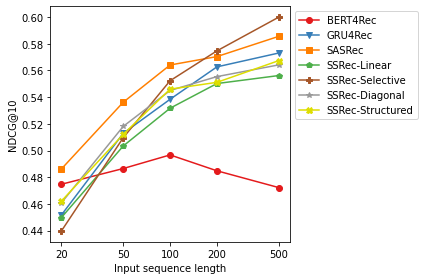

In [29]:
x_column = "data_params.collator_params.lookback"
x_label = "Input sequence length"
y_column = "NDCG_@10"
y_label = y_column.replace("_", "")
plot_name = "lookback_NDCG@10"

ax_instructions = {"set_xscale": {"value": "log"},
                   "get_xaxis": {"__kwargs__":{},
                                 "set_tick_params": {"which":"minor", "size":0}},
                   "get_xaxis": {"__kwargs__":{},
                                 "set_tick_params": {"which":"minor", "width":0}},
                   "set_xticks": {"ticks": table[x_column].unique().astype(int), "labels": table[x_column].unique().astype(int)},
                   "set_xlabel": {"xlabel": x_label},
                   "set_ylabel": {"ylabel": y_label},
                   #"set_title": {"value": plot_name},
                   "legend": {"loc": "upper left", "bbox_to_anchor": (1, 1)}}

label_convert_dict = {"SSRec_LSSL": "SSRec-Linear",
                      "SSRec_S4_nplr": "SSRec-Structured",
                      "SSRec_S4_diag": "SSRec-Diagonal",
                      "SSRec_Mamba": "SSRec-Selective"}

single_plot(table, ["model_name"], x_column, y_column, plot_name,
            ax_instructions = ax_instructions, label_convert_dict = label_convert_dict)

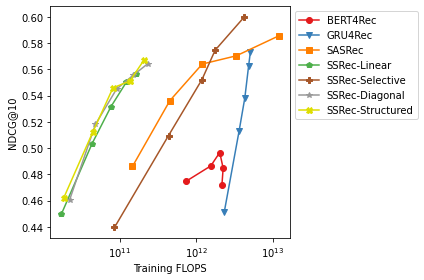

In [30]:
x_column = "train_FLOPS"
x_label = "Training FLOPS"
y_column = "NDCG_@10"
y_label = y_column.replace("_", "")
plot_name = "lookback_train_FLOPS_NDCG@10"

ax_instructions = {"set_xscale": {"value": "log"},
                   "get_xaxis": {"__kwargs__":{},
                                 "set_tick_params": {"which":"minor", "size":0}},
                   "get_xaxis": {"__kwargs__":{},
                                 "set_tick_params": {"which":"minor", "width":0}},
                #    "set_xticks": {"ticks": table[x_column].unique().astype(int), "labels": table[x_column].unique().astype(int)},
                   "set_xlabel": {"xlabel": x_label},
                   "set_ylabel": {"ylabel": y_label},
                   #"set_title": {"value": plot_name},
                   "legend": {"loc": "upper left", "bbox_to_anchor": (1, 1)}}

label_convert_dict = {"SSRec_LSSL": "SSRec-Linear",
                      "SSRec_S4_nplr": "SSRec-Structured",
                      "SSRec_S4_diag": "SSRec-Diagonal",
                      "SSRec_Mamba": "SSRec-Selective"}

single_plot(table, ["model_name"], x_column, y_column, plot_name,
            plot_type="plot",
            ax_instructions = ax_instructions, label_convert_dict = label_convert_dict)

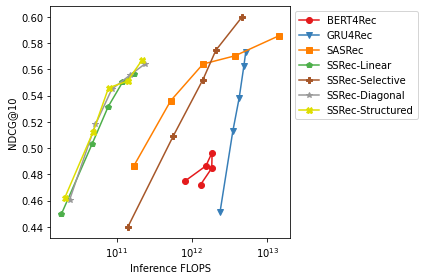

In [31]:
x_column = "test_FLOPS"
x_label = "Inference FLOPS"
y_column = "NDCG_@10"
y_label = y_column.replace("_", "")
plot_name = "lookback_test_FLOPS_NDCG@10"

ax_instructions = {"set_xscale": {"value": "log"},
                   "get_xaxis": {"__kwargs__":{},
                                 "set_tick_params": {"which":"minor", "size":0}},
                   "get_xaxis": {"__kwargs__":{},
                                 "set_tick_params": {"which":"minor", "width":0}},
                #    "set_xticks": {"ticks": table[x_column].unique().astype(int), "labels": table[x_column].unique().astype(int)},
                   "set_xlabel": {"xlabel": x_label},
                   "set_ylabel": {"ylabel": y_label},
                   #"set_title": {"value": plot_name},
                   "legend": {"loc": "upper left", "bbox_to_anchor": (1, 1)}}

label_convert_dict = {"SSRec_LSSL": "SSRec-Linear",
                      "SSRec_S4_nplr": "SSRec-Structured",
                      "SSRec_S4_diag": "SSRec-Diagonal",
                      "SSRec_Mamba": "SSRec-Selective"}

single_plot(table, ["model_name"], x_column, y_column, plot_name,
            plot_type="plot",
            ax_instructions = ax_instructions, label_convert_dict = label_convert_dict)

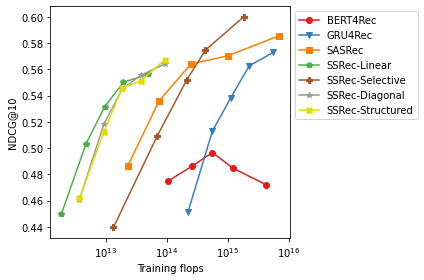

In [32]:
x_column = "train_flops"
x_label = "Training flops"
y_column = "NDCG_@10"
y_label = y_column.replace("_", "")
plot_name = "lookback_train_flops_NDCG@10"

ax_instructions = {"set_xscale": {"value": "log"},
                   "get_xaxis": {"__kwargs__":{},
                                 "set_tick_params": {"which":"minor", "size":0}},
                   "get_xaxis": {"__kwargs__":{},
                                 "set_tick_params": {"which":"minor", "width":0}},
                #    "set_xticks": {"ticks": table[x_column].unique().astype(int), "labels": table[x_column].unique().astype(int)},
                   "set_xlabel": {"xlabel": x_label},
                   "set_ylabel": {"ylabel": y_label},
                   #"set_title": {"value": plot_name},
                   "legend": {"loc": "upper left", "bbox_to_anchor": (1, 1)}}

label_convert_dict = {"SSRec_LSSL": "SSRec-Linear",
                      "SSRec_S4_nplr": "SSRec-Structured",
                      "SSRec_S4_diag": "SSRec-Diagonal",
                      "SSRec_Mamba": "SSRec-Selective"}

single_plot(table, ["model_name"], x_column, y_column, plot_name,
            plot_type="plot",
            ax_instructions = ax_instructions, label_convert_dict = label_convert_dict)

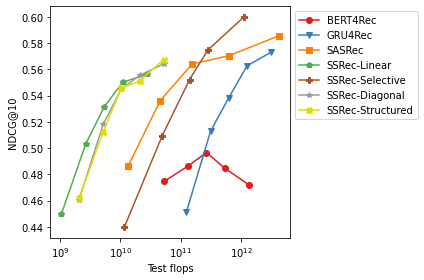

In [33]:
x_column = "test_flops"
x_label = "Test flops"
y_column = "NDCG_@10"
y_label = y_column.replace("_", "")
plot_name = "lookback_test_flops_NDCG@10"

ax_instructions = {"set_xscale": {"value": "log"},
                   "get_xaxis": {"__kwargs__":{},
                                 "set_tick_params": {"which":"minor", "size":0}},
                   "get_xaxis": {"__kwargs__":{},
                                 "set_tick_params": {"which":"minor", "width":0}},
                #    "set_xticks": {"ticks": table[x_column].unique().astype(int), "labels": table[x_column].unique().astype(int)},
                   "set_xlabel": {"xlabel": x_label},
                   "set_ylabel": {"ylabel": y_label},
                   #"set_title": {"value": plot_name},
                   "legend": {"loc": "upper left", "bbox_to_anchor": (1, 1)}}

label_convert_dict = {"SSRec_LSSL": "SSRec-Linear",
                      "SSRec_S4_nplr": "SSRec-Structured",
                      "SSRec_S4_diag": "SSRec-Diagonal",
                      "SSRec_Mamba": "SSRec-Selective"}

single_plot(table, ["model_name"], x_column, y_column, plot_name,
            plot_type="plot",
            ax_instructions = ax_instructions, label_convert_dict = label_convert_dict)

### Lookback

In [34]:
rows_labels = ["data_params.name","model_name"]
rows_labels += ["model.rec_model.emb_size"]
metrics_names = ["Precision", "Recall", "NDCG", "MAP"]
metrics_ks = [5, 10, 20]
column_labels = sorted([f"{metric}_@{k}" for metric in metrics_names for k in metrics_ks])
column_labels += ["train_flops", "test_flops", "train_FLOPS", "test_FLOPS"]
subset_selection = {"data_params.name":"ml-1m", "data_params.collator_params.lookback":200}
subset_keep = [[{"model.rec_model.ss_name":"LSSL"},{"model.rec_model.ss_config.channels":1}],
               [{"model.rec_model.ss_name":"Mamba"},{"model.rec_model.ss_config.d_state":16}]]
merge_columns = {"model_name":["model.rec_model.name","model.rec_model.ss_name","model.rec_model.ss_config.mode"]}

In [35]:
table = generate_table(subset_data(complete_data, subset_selection, subset_keep, merge_columns), rows_labels, column_labels, exp_name = "april_30", save_table=True)
table

,data_params.name,model_name,model.rec_model.emb_size,MAP_@10,MAP_@20,MAP_@5,NDCG_@10,NDCG_@20,NDCG_@5,Precision_@10,Precision_@20,Precision_@5,Recall_@10,Recall_@20,Recall_@5,test_FLOPS,test_flops,train_FLOPS,train_flops
0,ml-1m,BERT4Rec,64.0,0.1334,0.0935,0.1778,0.4848,0.5131,0.4436,0.0737,0.0424,0.1220,0.7371,0.8483,0.6101,1.830000e+12,5.285000e+11,2.250000e+12,1.208800e+15
1,ml-1m,GRU4Rec,32.0,0.1548,0.1054,0.2138,0.5539,0.5773,0.5170,0.0785,0.0438,0.1342,0.7846,0.8767,0.6710,3.100000e+12,5.734200e+11,3.130000e+12,1.032210e+15
2,ml-1m,GRU4Rec,64.0,0.1583,0.1071,0.2204,0.5627,0.5858,0.5298,0.0781,0.0436,0.1361,0.7811,0.8719,0.6805,4.880000e+12,1.240000e+12,4.840000e+12,2.224740e+15
3,ml-1m,GRU4Rec,128.0,0.1563,0.1060,0.2170,0.5579,0.5806,0.5221,0.0780,0.0435,0.1341,0.7800,0.8694,0.6704,6.910000e+12,2.830000e+12,6.840000e+12,5.090770e+15
4,ml-1m,GRU4Rec,256.0,0.1557,0.1057,0.2154,0.5566,0.5800,0.5202,0.0782,0.0437,0.1342,0.7821,0.8747,0.6710,9.040000e+12,7.080000e+12,8.830000e+12,1.274670e+16
5,ml-1m,GRU4Rec,512.0,0.1598,0.1079,0.2230,0.5683,0.5910,0.5354,0.0786,0.0438,0.1369,0.7856,0.8752,0.6844,1.158000e+13,1.986000e+13,1.165000e+13,3.575400e+16
6,ml-1m,SASRec,32.0,0.1525,0.1041,0.2098,0.5466,0.5701,0.5097,0.0779,0.0436,0.1332,0.7791,0.8717,0.6659,7.097400e+11,9.227000e+10,4.972200e+11,1.104300e+14
7,ml-1m,SASRec,64.0,0.1600,0.1082,0.2224,0.5704,0.5920,0.5361,0.0795,0.0440,0.1379,0.7954,0.8808,0.6897,3.730000e+12,6.150200e+11,3.350000e+12,9.957500e+14
8,ml-1m,SASRec,128.0,0.1664,0.1115,0.2341,0.5892,0.6106,0.5579,0.0800,0.0442,0.1407,0.7998,0.8839,0.7036,4.320000e+12,9.727400e+11,3.800000e+12,1.528340e+15
9,ml-1m,SASRec,256.0,0.1656,0.1111,0.2331,0.5870,0.6084,0.5556,0.0796,0.0440,0.1399,0.7962,0.8803,0.6995,8.470000e+12,3.390000e+12,7.100000e+12,5.657460e+15


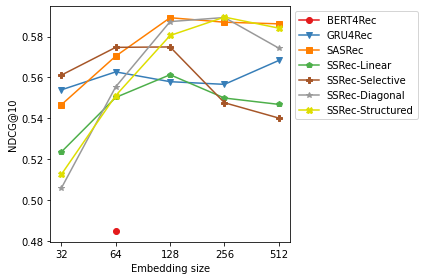

In [36]:
x_column = "model.rec_model.emb_size"
x_label = "Embedding size"
y_column = "NDCG_@10"
y_label = y_column.replace("_", "")
plot_name = "emb_size_NDCG@10"

ax_instructions = {"set_xscale": {"value": "log"},
                   "get_xaxis": {"__kwargs__":{},
                                 "set_tick_params": {"which":"minor", "size":0}},
                   "get_xaxis": {"__kwargs__":{},
                                 "set_tick_params": {"which":"minor", "width":0}},
                   "set_xticks": {"ticks": table[x_column].unique().astype(int), "labels": table[x_column].unique().astype(int)},
                   "set_xlabel": {"xlabel": x_label},
                   "set_ylabel": {"ylabel": y_label},
                   #"set_title": {"value": plot_name},
                   "legend": {"loc": "upper left", "bbox_to_anchor": (1, 1)}}

label_convert_dict = {"SSRec_LSSL": "SSRec-Linear",
                      "SSRec_S4_nplr": "SSRec-Structured",
                      "SSRec_S4_diag": "SSRec-Diagonal",
                      "SSRec_Mamba": "SSRec-Selective"}

single_plot(table, ["model_name"], x_column, y_column, plot_name,
            ax_instructions = ax_instructions, label_convert_dict = label_convert_dict)

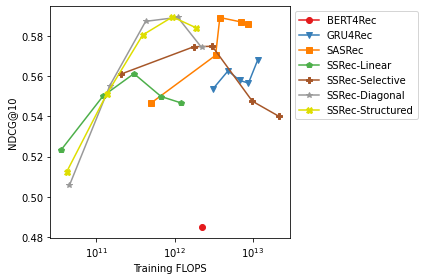

In [37]:
x_column = "train_FLOPS"
x_label = "Training FLOPS"
y_column = "NDCG_@10"
y_label = y_column.replace("_", "")
plot_name = "emb_size_train_FLOPS_NDCG@10"

ax_instructions = {"set_xscale": {"value": "log"},
                   "get_xaxis": {"__kwargs__":{},
                                 "set_tick_params": {"which":"minor", "size":0}},
                   "get_xaxis": {"__kwargs__":{},
                                 "set_tick_params": {"which":"minor", "width":0}},
                #    "set_xticks": {"ticks": table[x_column].unique().astype(int), "labels": table[x_column].unique().astype(int)},
                   "set_xlabel": {"xlabel": x_label},
                   "set_ylabel": {"ylabel": y_label},
                   #"set_title": {"value": plot_name},
                   "legend": {"loc": "upper left", "bbox_to_anchor": (1, 1)}}

label_convert_dict = {"SSRec_LSSL": "SSRec-Linear",
                      "SSRec_S4_nplr": "SSRec-Structured",
                      "SSRec_S4_diag": "SSRec-Diagonal",
                      "SSRec_Mamba": "SSRec-Selective"}

single_plot(table, ["model_name"], x_column, y_column, plot_name,
            plot_type="plot",
            ax_instructions = ax_instructions, label_convert_dict = label_convert_dict)

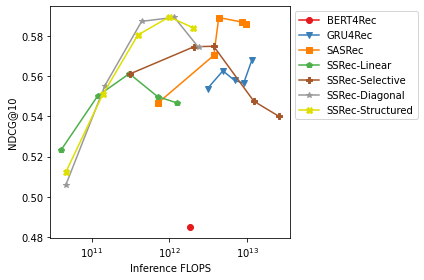

In [38]:
x_column = "test_FLOPS"
x_label = "Inference FLOPS"
y_column = "NDCG_@10"
y_label = y_column.replace("_", "")
plot_name = "emb_size_test_FLOPS_NDCG@10"

ax_instructions = {"set_xscale": {"value": "log"},
                   "get_xaxis": {"__kwargs__":{},
                                 "set_tick_params": {"which":"minor", "size":0}},
                   "get_xaxis": {"__kwargs__":{},
                                 "set_tick_params": {"which":"minor", "width":0}},
                #    "set_xticks": {"ticks": table[x_column].unique().astype(int), "labels": table[x_column].unique().astype(int)},
                   "set_xlabel": {"xlabel": x_label},
                   "set_ylabel": {"ylabel": y_label},
                   #"set_title": {"value": plot_name},
                   "legend": {"loc": "upper left", "bbox_to_anchor": (1, 1)}}

label_convert_dict = {"SSRec_LSSL": "SSRec-Linear",
                      "SSRec_S4_nplr": "SSRec-Structured",
                      "SSRec_S4_diag": "SSRec-Diagonal",
                      "SSRec_Mamba": "SSRec-Selective"}

single_plot(table, ["model_name"], x_column, y_column, plot_name,
            plot_type="plot",
            ax_instructions = ax_instructions, label_convert_dict = label_convert_dict)

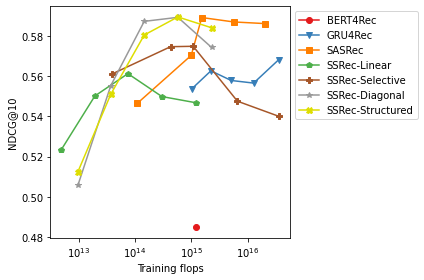

In [39]:
x_column = "train_flops"
x_label = "Training flops"
y_column = "NDCG_@10"
y_label = y_column.replace("_", "")
plot_name = "emb_size_train_flops_NDCG@10"

ax_instructions = {"set_xscale": {"value": "log"},
                   "get_xaxis": {"__kwargs__":{},
                                 "set_tick_params": {"which":"minor", "size":0}},
                   "get_xaxis": {"__kwargs__":{},
                                 "set_tick_params": {"which":"minor", "width":0}},
                #    "set_xticks": {"ticks": table[x_column].unique().astype(int), "labels": table[x_column].unique().astype(int)},
                   "set_xlabel": {"xlabel": x_label},
                   "set_ylabel": {"ylabel": y_label},
                   #"set_title": {"value": plot_name},
                   "legend": {"loc": "upper left", "bbox_to_anchor": (1, 1)}}

label_convert_dict = {"SSRec_LSSL": "SSRec-Linear",
                      "SSRec_S4_nplr": "SSRec-Structured",
                      "SSRec_S4_diag": "SSRec-Diagonal",
                      "SSRec_Mamba": "SSRec-Selective"}

single_plot(table, ["model_name"], x_column, y_column, plot_name,
            plot_type="plot",
            ax_instructions = ax_instructions, label_convert_dict = label_convert_dict)

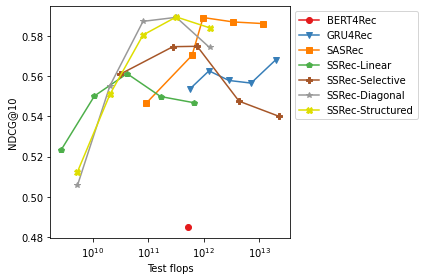

In [40]:
x_column = "test_flops"
x_label = "Test flops"
y_column = "NDCG_@10"
y_label = y_column.replace("_", "")
plot_name = "emb_size_test_flops_NDCG@10"

ax_instructions = {"set_xscale": {"value": "log"},
                   "get_xaxis": {"__kwargs__":{},
                                 "set_tick_params": {"which":"minor", "size":0}},
                   "get_xaxis": {"__kwargs__":{},
                                 "set_tick_params": {"which":"minor", "width":0}},
                #    "set_xticks": {"ticks": table[x_column].unique().astype(int), "labels": table[x_column].unique().astype(int)},
                   "set_xlabel": {"xlabel": x_label},
                   "set_ylabel": {"ylabel": y_label},
                   #"set_title": {"value": plot_name},
                   "legend": {"loc": "upper left", "bbox_to_anchor": (1, 1)}}

label_convert_dict = {"SSRec_LSSL": "SSRec-Linear",
                      "SSRec_S4_nplr": "SSRec-Structured",
                      "SSRec_S4_diag": "SSRec-Diagonal",
                      "SSRec_Mamba": "SSRec-Selective"}

single_plot(table, ["model_name"], x_column, y_column, plot_name,
            plot_type="plot",
            ax_instructions = ax_instructions, label_convert_dict = label_convert_dict)

## Plot per epoch

In [41]:
rows_labels = ["data_params.name","model_name"]
metrics_names = ["Precision", "Recall", "NDCG", "MAP"]
metrics_ks = [5, 10, 20]
column_labels = sorted([f"{metric}_@{k}" for metric in metrics_names for k in metrics_ks])
column_labels += ["train_flops", "test_flops", "train_FLOPS", "test_FLOPS"]
subset_selection = {"data_params.name":"ml-1m", "data_params.collator_params.lookback":200, "model.rec_model.emb_size":64}
subset_keep = [[{"model.rec_model.ss_name":"LSSL"},{"model.rec_model.ss_config.channels":1}],
               [{"model.rec_model.ss_name":"Mamba"},{"model.rec_model.ss_config.d_state":16}]]
merge_columns = {"model_name":["model.rec_model.name","model.rec_model.ss_name","model.rec_model.ss_config.mode"]}

In [42]:
table = subset_data(complete_data, subset_selection, subset_keep, merge_columns)
table

,data_params.collator_params.lookback,data_params.collator_params.lookforward,data_params.collator_params.num_items,data_params.collator_params.num_negatives.test,data_params.collator_params.num_negatives.train,data_params.collator_params.num_negatives.val,data_params.collator_params.out_seq_len.test,data_params.collator_params.out_seq_len.train,data_params.collator_params.out_seq_len.val,data_params.collator_params.padding_value,...,test_timestamp,train_num_params,train_flops,train_latency,train_FLOPS,test_num_params,test_flops,test_latency,test_FLOPS,model_name
6FsRXbceFAlMmdfE,200.0,1.0,3416.0,100.0,1.0,1.0,1.0,None,1.0,0.0,...,2024-05-03T15:11:30,239940.0,1.936000e+13,158.75,1.219400e+11,239940.0,1.083000e+10,90.35,1.198900e+11,SSRec_LSSL
D1Cl9hykaqyjK3Nu,200.0,1.0,3416.0,100.0,1.0,1.0,1.0,None,1.0,0.0,...,2024-05-01T01:24:35,256580.0,3.716000e+13,274.19,1.355300e+11,256580.0,2.064000e+10,147.56,1.398900e+11,SSRec_S4_nplr
GIABZT4FtDwLPO6C,200.0,1.0,3416.0,100.0,1.0,1.0,1.0,None,1.0,0.0,...,2024-05-05T03:11:57,281600.0,9.957500e+14,296.80,3.350000e+12,281600.0,6.150200e+11,164.89,3.730000e+12,SASRec
KA05BGtEerELPLCB,200.0,0.0,3416.0,100.0,1.0,1.0,1.0,None,1.0,0.0,...,2024-05-04T16:48:16,503710.0,1.208800e+15,536.96,2.250000e+12,503710.0,5.285000e+11,289.16,1.830000e+12,BERT4Rec
QdUvtr9MSSBidiNJ,200.0,1.0,3416.0,100.0,1.0,1.0,1.0,None,1.0,0.0,...,2024-05-04T01:19:11,733980.0,2.224740e+15,460.04,4.840000e+12,733980.0,1.240000e+12,253.27,4.880000e+12,GRU4Rec
orbs2PcTc3emZiqG,200.0,1.0,3416.0,100.0,1.0,1.0,1.0,None,1.0,0.0,...,2024-05-01T01:25:15,264380.0,4.272800e+14,240.86,1.770000e+12,264380.0,2.781900e+11,133.97,2.080000e+12,SSRec_Mamba
rR8YBN7Y3LQ5sebv,200.0,1.0,3416.0,100.0,1.0,1.0,1.0,None,1.0,0.0,...,2024-05-01T01:23:32,252480.0,3.716000e+13,249.73,1.487900e+11,252480.0,2.064000e+10,138.75,1.487800e+11,SSRec_S4_diag


In [43]:
def merge_epoch_data(metrics_per_epoch, table, table_columns = [], epoch_column_not_na = "val_loss/dataloader_idx_1"):
    subset_metrics = {}
    for exp_id in table.index:
        subset_metrics[exp_id] = metrics_per_epoch[exp_id]
    
        subset_metrics[exp_id] = subset_metrics[exp_id].loc[~subset_metrics[exp_id][epoch_column_not_na].isna()]
        
        for col in table_columns:
            subset_metrics[exp_id].loc[:,col] = table.loc[exp_id,col]
    
    #concat all dataframes by row
    subset_metrics = pd.concat(subset_metrics)
    
    return subset_metrics

In [44]:
table = merge_epoch_data(metrics_per_epoch, table, rows_labels)
table

/tmp/ipykernel_327468/176174044.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_metrics[exp_id].loc[:,col] = table.loc[exp_id,col]
/tmp/ipykernel_327468/176174044.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_metrics[exp_id].loc[:,col] = table.loc[exp_id,col]
/tmp/ipykernel_327468/176174044.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

epoch   step  test_F1_@10  test_F1_@20  test_F1_@5  \
6FsRXbceFAlMmdfE 0         0     47          NaN          NaN         NaN   
                 2         1     95          NaN          NaN         NaN   
                 4         2    143          NaN          NaN         NaN   
                 6         3    191          NaN          NaN         NaN   
                 8         4    239          NaN          NaN         NaN   
...                      ...    ...          ...          ...         ...   
rR8YBN7Y3LQ5sebv 1190    595  28607          NaN          NaN         NaN   
                 1192    596  28655          NaN          NaN         NaN   
                 1194    597  28703          NaN          NaN         NaN   
                 1196    598  28751          NaN          NaN         NaN   
                 1198    599  28799          NaN          NaN         NaN   

                       test_MAP_@10  test_MAP_@20  test_MAP_@5  test_MRR_@10  \
6FsRXbceFAlMmdfE 0              NaN           NaN          NaN           NaN   
                 2              NaN           NaN          NaN           NaN   
                 4              NaN           NaN          NaN           NaN   
                 6              NaN           NaN          NaN           NaN   
                 8              NaN           NaN          NaN           NaN   
...                             ...           ...          ...           ...   
rR8YBN7Y3LQ5sebv 1190           NaN           NaN          NaN           NaN   
                 1192           NaN           NaN          NaN           NaN   
                 1194           NaN           NaN          NaN           NaN   
                 1196           NaN           NaN          NaN           NaN   
                 1198           NaN           NaN          NaN           NaN   

                       test_MRR_@20  ...  test_ram_power  test_cpu_energy  \
6FsRXbceFAlMmdfE 0              NaN  ...             NaN              NaN   
                 2              NaN  ...             NaN              NaN   
                 4              NaN  ...             NaN              NaN   
                 6              NaN  ...             NaN              NaN   
                 8              NaN  ...             NaN              NaN   
...                             ...  ...             ...              ...   
rR8YBN7Y3LQ5sebv 1190           NaN  ...             NaN              NaN   
                 1192           NaN  ...             NaN              NaN   
                 1194           NaN  ...             NaN              NaN   
                 1196           NaN  ...             NaN              NaN   
                 1198           NaN  ...             NaN              NaN   

                       test_gpu_energy  test_ram_energy  test_energy_consumed  \
6FsRXbceFAlMmdfE 0                 NaN              NaN                   NaN   
                 2                 NaN              NaN                   NaN   
                 4                 NaN              NaN                   NaN   
                 6                 NaN              NaN                   NaN   
                 8                 NaN              NaN                   NaN   
...                                ...              ...                   ...   
rR8YBN7Y3LQ5sebv 1190              NaN              NaN                   NaN   
                 1192              NaN              NaN                   NaN   
                 1194              NaN              NaN                   NaN   
                 1196              NaN              NaN                   NaN   
                 1198              NaN              NaN                   NaN   

                       test_flops  test_latency  test_FLOPS  data_params.name  \
6FsRXbceFAlMmdfE 0            NaN           NaN         NaN             ml-1m   
                 2            NaN           NaN         NaN             ml-1m

In [45]:
table

epoch   step  test_F1_@10  test_F1_@20  test_F1_@5  \
6FsRXbceFAlMmdfE 0         0     47          NaN          NaN         NaN   
                 2         1     95          NaN          NaN         NaN   
                 4         2    143          NaN          NaN         NaN   
                 6         3    191          NaN          NaN         NaN   
                 8         4    239          NaN          NaN         NaN   
...                      ...    ...          ...          ...         ...   
rR8YBN7Y3LQ5sebv 1190    595  28607          NaN          NaN         NaN   
                 1192    596  28655          NaN          NaN         NaN   
                 1194    597  28703          NaN          NaN         NaN   
                 1196    598  28751          NaN          NaN         NaN   
                 1198    599  28799          NaN          NaN         NaN   

                       test_MAP_@10  test_MAP_@20  test_MAP_@5  test_MRR_@10  \
6FsRXbceFAlMmdfE 0              NaN           NaN          NaN           NaN   
                 2              NaN           NaN          NaN           NaN   
                 4              NaN           NaN          NaN           NaN   
                 6              NaN           NaN          NaN           NaN   
                 8              NaN           NaN          NaN           NaN   
...                             ...           ...          ...           ...   
rR8YBN7Y3LQ5sebv 1190           NaN           NaN          NaN           NaN   
                 1192           NaN           NaN          NaN           NaN   
                 1194           NaN           NaN          NaN           NaN   
                 1196           NaN           NaN          NaN           NaN   
                 1198           NaN           NaN          NaN           NaN   

                       test_MRR_@20  ...  test_ram_power  test_cpu_energy  \
6FsRXbceFAlMmdfE 0              NaN  ...             NaN              NaN   
                 2              NaN  ...             NaN              NaN   
                 4              NaN  ...             NaN              NaN   
                 6              NaN  ...             NaN              NaN   
                 8              NaN  ...             NaN              NaN   
...                             ...  ...             ...              ...   
rR8YBN7Y3LQ5sebv 1190           NaN  ...             NaN              NaN   
                 1192           NaN  ...             NaN              NaN   
                 1194           NaN  ...             NaN              NaN   
                 1196           NaN  ...             NaN              NaN   
                 1198           NaN  ...             NaN              NaN   

                       test_gpu_energy  test_ram_energy  test_energy_consumed  \
6FsRXbceFAlMmdfE 0                 NaN              NaN                   NaN   
                 2                 NaN              NaN                   NaN   
                 4                 NaN              NaN                   NaN   
                 6                 NaN              NaN                   NaN   
                 8                 NaN              NaN                   NaN   
...                                ...              ...                   ...   
rR8YBN7Y3LQ5sebv 1190              NaN              NaN                   NaN   
                 1192              NaN              NaN                   NaN   
                 1194              NaN              NaN                   NaN   
                 1196              NaN              NaN                   NaN   
                 1198              NaN              NaN                   NaN   

                       test_flops  test_latency  test_FLOPS  data_params.name  \
6FsRXbceFAlMmdfE 0            NaN           NaN         NaN             ml-1m   
                 2            NaN           NaN         NaN             ml-1m

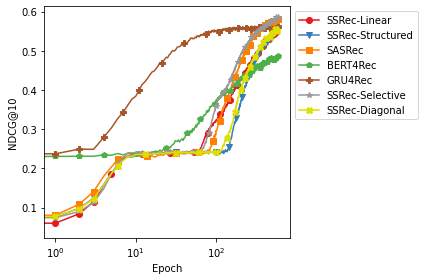

In [46]:
x_column = "epoch"
x_label = "Epoch"
y_column = "val_NDCG_@10/dataloader_idx_1"
y_label = "NDCG@10"
plot_name = "epochs_NDCG@10"

plot_kwargs = {"markevery": 0.1}

ax_instructions = {
                   "set_xscale": {"value": "log"},
                   "get_xaxis": {"__kwargs__":{},
                                 "set_tick_params": {"which":"minor", "size":0}},
                   "get_xaxis": {"__kwargs__":{},
                                 "set_tick_params": {"which":"minor", "width":0}},
                #    "set_xticks": {"ticks": table[x_column].unique().astype(int), "labels": table[x_column].unique().astype(int)},
                   "set_xlabel": {"xlabel": x_label},
                   "set_ylabel": {"ylabel": y_label},
                   #"set_title": {"value": plot_name},
                   "legend": {"loc": "upper left", "bbox_to_anchor": (1, 1)}}

label_convert_dict = {"SSRec_LSSL": "SSRec-Linear",
                      "SSRec_S4_nplr": "SSRec-Structured",
                      "SSRec_S4_diag": "SSRec-Diagonal",
                      "SSRec_Mamba": "SSRec-Selective"}

single_plot(table, ["model_name"], x_column, y_column, plot_name,
            plot_type="plot", plot_kwargs=plot_kwargs,
            ax_instructions = ax_instructions, label_convert_dict = label_convert_dict)

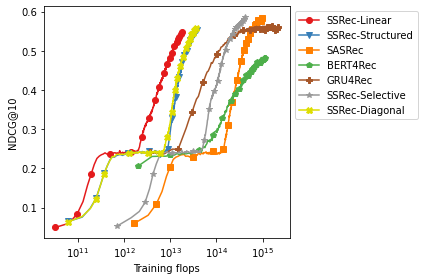

In [47]:
x_column = "train_flops"
x_label = "Training flops"
y_column = "val_NDCG_@10/dataloader_idx_1"
y_label = "NDCG@10"
plot_name = "epochs_train_flops_NDCG@10"

plot_kwargs = {"markevery": 0.1}

ax_instructions = {
                   "set_xscale": {"value": "log"},
                   "get_xaxis": {"__kwargs__":{},
                                 "set_tick_params": {"which":"minor", "size":0}},
                   "get_xaxis": {"__kwargs__":{},
                                 "set_tick_params": {"which":"minor", "width":0}},
                #    "set_xticks": {"ticks": table[x_column].unique().astype(int), "labels": table[x_column].unique().astype(int)},
                   "set_xlabel": {"xlabel": x_label},
                   "set_ylabel": {"ylabel": y_label},
                   #"set_title": {"value": plot_name},
                   "legend": {"loc": "upper left", "bbox_to_anchor": (1, 1)}}

label_convert_dict = {"SSRec_LSSL": "SSRec-Linear",
                      "SSRec_S4_nplr": "SSRec-Structured",
                      "SSRec_S4_diag": "SSRec-Diagonal",
                      "SSRec_Mamba": "SSRec-Selective"}

single_plot(table, ["model_name"], x_column, y_column, plot_name,
            plot_type="plot", plot_kwargs=plot_kwargs,
            ax_instructions = ax_instructions, label_convert_dict = label_convert_dict)

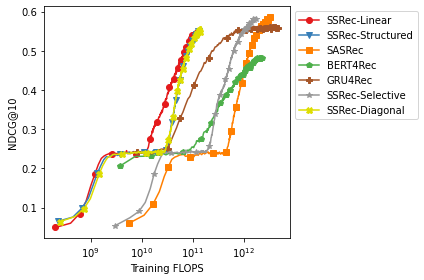

In [48]:
x_column = "train_FLOPS"
x_label = "Training FLOPS"
y_column = "val_NDCG_@10/dataloader_idx_1"
y_label = "NDCG@10"
plot_name = "epochs_train_FLOPS_NDCG@10"

plot_kwargs = {"markevery": 0.1}

ax_instructions = {
                   "set_xscale": {"value": "log"},
                   "get_xaxis": {"__kwargs__":{},
                                 "set_tick_params": {"which":"minor", "size":0}},
                   "get_xaxis": {"__kwargs__":{},
                                 "set_tick_params": {"which":"minor", "width":0}},
                #    "set_xticks": {"ticks": table[x_column].unique().astype(int), "labels": table[x_column].unique().astype(int)},
                   "set_xlabel": {"xlabel": x_label},
                   "set_ylabel": {"ylabel": y_label},
                   #"set_title": {"value": plot_name},
                   "legend": {"loc": "upper left", "bbox_to_anchor": (1, 1)}}

label_convert_dict = {"SSRec_LSSL": "SSRec-Linear",
                      "SSRec_S4_nplr": "SSRec-Structured",
                      "SSRec_S4_diag": "SSRec-Diagonal",
                      "SSRec_Mamba": "SSRec-Selective"}

single_plot(table, ["model_name"], x_column, y_column, plot_name,
            plot_type="plot", plot_kwargs=plot_kwargs,
            ax_instructions = ax_instructions, label_convert_dict = label_convert_dict)

# Plot with a unique ablation

In [49]:
def plot_from_csv_unique(ablation_type: str, all_models = ['NARM', 'GRU4Rec'],
                         file_names: dict = None, folder_name: str = '../out/log/', exp_name: str = 'prova',
                         dataset_name: str = 'ml-1m',
                         metric='NDCG@20'):
    results = {}
    colors = obtain_color(len(all_models))
    markers = obtain_markers(len(all_models))

    # Convert the name of the metric from a readable string to a string of the csv file
    metric_real_name = f"val_{metric.split('@')[0]}_@{metric.split('@')[1]}/dataloader_idx_0"
    
    for model_name in all_models:

    # Obtain all the files describing the ablations we are considering
        file_names = check_desired_configuration(ablation_type, model_name, dataset_name, folder_name, exp_name)
        results[model_name] = {}
        # Read data and store values for all lines
        for ablation_param, file_name in file_names.items():
            complete_name = os.path.join(folder_name,exp_name,file_name,'lightning_logs/version_0/metrics.csv')
            print(folder_name,exp_name,file_name, complete_name)
            print(os.path.join(folder_name,exp_name,file_name,'lightning_logs/version_0/metrics.csv'))
            data = pd.read_csv(complete_name)
            argmax = np.argmax(data[metric_real_name])
            results[model_name][ablation_param] = data[metric_real_name.replace('idx_0','idx_1')][argmax]
            
    for index, (model, data) in enumerate(results.items()):
        ablation_values = list(data.keys())
        y_values = list(data.values())
        plt.plot(ablation_values, y_values, label=model, color=colors[index], marker=markers[index])
    plt.xscale('log')
    plt.xticks(ablation_values, ablation_values)
    plt.xlabel(names_to_labels[ablation_type])
    plt.ylabel(metric)
    plt.title(names_to_labels[dataset_name])
    plt.legend()
    plt.show()

In [50]:
plot_from_csv_unique('emb_size', all_models=['SASRec','NARM', 'GRU4Rec', 'BERT4Rec', 'CORE'], dataset_name='amazon_beauty', exp_name="april_30")

NameError: name 'check_desired_configuration' is not defined

# Plot for paper

In [ ]:
def plot_from_csv_multiple(ablation_type: str, all_models = ['NARM', 'GRU4Rec'],
                         file_names: dict = None, folder_name: str = '../out/log/', exp_name: str = 'prova',
                         all_datasets = ['ml-1m'],
                         metric='NDCG@20'):
    fig, axs = plt.subplots(3, 2, figsize=(8, 8))
    axs = axs.flatten()
    all_datasets.sort()
    for dataset_name in all_datasets:
        results = {}
        colors = obtain_color(len(all_models))
        markers = obtain_markers(len(all_models))

        # Convert the name of the metric from a readable string to a string of the csv file
        metric_real_name = f"val_{metric.split('@')[0]}_@{metric.split('@')[1]}/dataloader_idx_1"

        for model_name in all_models:

        # Obtain all the files describing the ablations we are considering
            file_names = check_desired_configuration(ablation_type, model_name, dataset_name)
            results[model_name] = {}
            # Read data and store values for all lines
            for ablation_param, file_name in file_names.items():
                complete_name = os.path.join(folder_name,exp_name,file_name,'lightning_logs/version_0/metrics.csv')
                data = pd.read_csv(complete_name)
                argmax = np.argmax(data[metric_real_name])
                results[model_name][ablation_param] = data[metric_real_name.replace('idx_0','idx_1')][argmax]

        for index, (model, data) in enumerate(results.items()):
            current_ax = axs[all_datasets.index(dataset_name)]
            if ablation_type!='carbon_emissions':
                ablation_values = list(data.keys())
            else:
                ablation_values = [x[1] for x in list(data.keys())]
            y_values = list(data.values())
            current_ax.plot(ablation_values, y_values, label=model, color=colors[index], marker=markers[index])
        current_ax.set_xscale('log')
        current_ax.xaxis.set_ticks([], minor=True)
        current_ax.set_xticks(ablation_values, ablation_values)
        current_ax.set_xlabel(names_to_labels[ablation_type])
        current_ax.set_ylabel(metric)
        current_ax.set_title(names_to_labels[dataset_name])
        current_ax.legend()
        current_ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        if ablation_type == 'carbon_emissions':
            current_ax.xaxis.set_ticks([], minor=True)
            mn, mx = current_ax.get_xlim()
            vector = np.linspace(mn*0.5, mx*1.1, 7)[1:-1]
            current_ax.xaxis.set_ticks(vector, vector)
            current_ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
            current_ax.set_xlabel(r'$CO_2$-eq [kg]')
            current_ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
        current_ax.grid(True, linewidth=0.5, alpha=0.5)
    plt.tight_layout()
    plt.savefig(f'{ablation_type}_ablation.pdf', format='pdf', dpi=800)

In [ ]:
plot_from_csv_multiple('lookback', all_models=all_models, all_datasets=all_datasets)